In [1]:
!pip install hpelm


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import hpelm

In [3]:
data = pd.read_csv('Agriculture_Manual_Daily_Labour_Wage_In_India_2010_2019.csv')
data.head()

,Centre,Gender,Labour Category,Labour Type,State,District,Wage(INR),Month,Year
0,BUKKAPATINAM,M,FIELD LABOUR,FIELD LABOUR,ANDHRA PRADESH,ANANTAPUR,216.0,Jul,2015
1,BUKKAPATINAM,W,FIELD LABOUR,FIELD LABOUR,ANDHRA PRADESH,ANANTAPUR,150.0,Jul,2015
2,BUKKAPATINAM,M,HERDSMEN,HERDSMEN,ANDHRA PRADESH,ANANTAPUR,200.0,Jul,2015
3,BUKKAPATINAM,W,HERDSMEN,HERDSMEN,ANDHRA PRADESH,ANANTAPUR,200.0,Jul,2015
4,BUKKAPATINAM,M,SKILLED \nLABOUR,CARPENTER,ANDHRA PRADESH,ANANTAPUR,300.0,Jul,2015


In [4]:
data = data.dropna()

In [5]:
X = data.drop('Wage(INR)', axis=1)
y = data['Wage(INR)'].values.reshape(-1, 1)

In [6]:
X = pd.get_dummies(X)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
elm = hpelm.ELM(X_train.shape[1], 1)
elm.add_neurons(1500, 'sigm')

In [10]:
elm.train(X_train, y_train, 'r')

In [12]:
from sklearn.metrics import mean_squared_error
y_pred = elm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3432.7499019504066


In [13]:
mae = mean_absolute_error(y_test, y_pred)
mae

43.23069071886348

In [14]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 58.589674021540745


In [15]:
r2 = r2_score(y_test, y_pred)
r2

0.7774275262569432

In [16]:
elm = hpelm.ELM(X_train.shape[1], 1)
elm.add_neurons(1500, 'tanh')

In [17]:
elm.train(X_train, y_train, 'r')

In [18]:
from sklearn.metrics import mean_squared_error
y_pred = elm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4166.505616929022


In [19]:
mae = mean_absolute_error(y_test, y_pred)
mae

48.274764545331166

In [20]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 64.54847493883199


In [21]:
r2 = r2_score(y_test, y_pred)
r2

0.7298523083498347

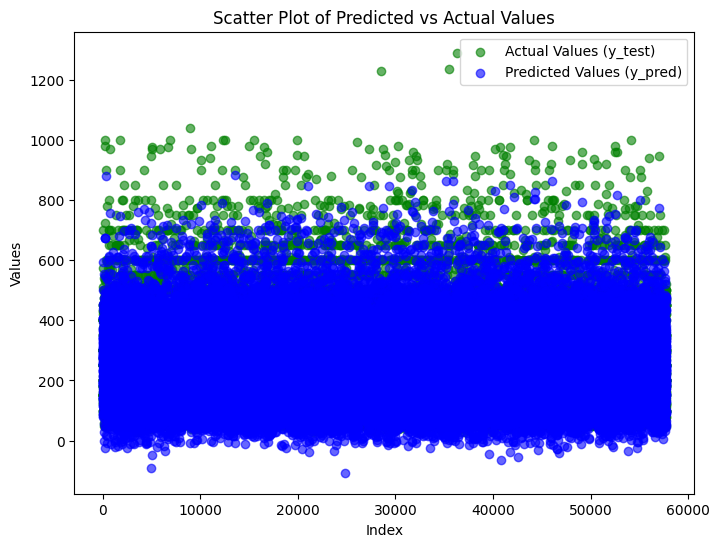

In [21]:
import matplotlib.pyplot as plt

# Assuming y_pred is your list of predicted values and y_test is your list of actual values

# Create a figure with specific size
plt.figure(figsize=(8, 6))

# Plot y_test as a line (if ordered) or scatter plot with a different color
plt.scatter(range(len(y_test)), y_test, color='green', alpha=0.6, label='Actual Values (y_test)')

# Plot y_pred as a scatter plot with a different color
plt.scatter(range(len(y_pred)), y_pred, color='blue', alpha=0.6, label='Predicted Values (y_pred)')

# Add labels and title
plt.xlabel('Index')  # Replace 'Index' with a more suitable x-axis label if needed
plt.ylabel('Values')
plt.title('Scatter Plot of Predicted vs Actual Values')

# Add a legend to distinguish the two plots
plt.legend()

# Show the plot
plt.show()

# the actual and predicted values are overlapping. it measn that the model is performing as expected.
# the points which are away from the majority points are the outliers.

File saved successfully


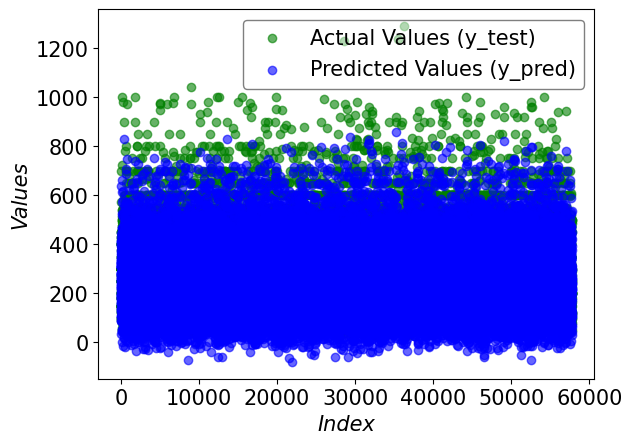

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np

# Configuration
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)

# Your existing plotting code remains the same
plt.scatter(range(len(y_test)), y_test, color='green', alpha=0.6, label='Actual Values (y_test)')
plt.scatter(range(len(y_pred)), y_pred, color='blue', alpha=0.6, label='Predicted Values (y_pred)')

plt.xlabel('Index', fontsize=15, style='italic')
plt.ylabel('Values', fontsize=15, style='italic')
plt.legend(loc=1, prop={'size': 15}, edgecolor='black', frameon=True, framealpha=0.5)

# Save the figure
plt.savefig("fig7.pdf", bbox_inches='tight')

# Alternative download/save methods
# Option 1: Simple save (already done with plt.savefig)
# Option 2: Use os to confirm file exists
import os
if os.path.exists("fig7.pdf"):
    print("File saved successfully")
# the actual and predicted values are overlapping. it measn that the model is performing as expected.
# the points which are away from the majority points are the outliers.